In [38]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [39]:
df = pd.read_csv('../data/data_cleaned.csv', dtype={'route': str}, low_memory=False)

In [40]:
# Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Basic statistical summary
print(df.describe())

               delay            gap        vehicle
count  143968.000000  143968.000000  139302.000000
mean       13.574218      19.963909    4603.694958
std        32.561074      34.990974    2192.227912
min         0.000000       0.000000       0.000000
25%         5.000000      10.000000    4111.000000
50%         8.000000      15.000000    4419.000000
75%        10.000000      20.000000    4545.000000
max      1400.000000    4216.000000  163242.000000


In [41]:
# Get unique values from the 'incident' column
print(df['incident'].unique())

['Late Leaving Garage' 'Utilized Off Route' 'Held By' 'Investigation'
 'Mechanical' 'Emergency Services' 'Diversion' 'General Delay'
 'Overhead - Pantograph' 'Security' 'Operations'
 'Collision - TTC Involved' 'Cleaning' 'Overhead' 'Late' 'Rail/Switches'
 'e' 'Late  ' 'Late Entering Service' 'Cleaning - Unsanitary'
 'Cleaning - Disinfection' 'Management']


In [42]:
# Define a mapping for merging the values within the 'incident' column
merge_mapping = {
    'Late Leaving Garage': 'Late',
    'Late': 'Late',
    'e': 'Late',
    'Late  ': 'Late',
    'Late Entering Service': 'Late',
    'Overhead - Pantograph': 'Overhead',
    'Overhead': 'Overhead',
    'Cleaning': 'Cleaning',
    'Cleaning - Unsanitary': 'Cleaning',
    'Cleaning - Disinfection': 'Cleaning'
}

# Apply the mapping to the 'incident' column
df['incident'] = df['incident'].replace(merge_mapping)

# Display unique incidents after merging
print("Unique incidents after merging:")
print(df['incident'].unique())

Unique incidents after merging:
['Late' 'Utilized Off Route' 'Held By' 'Investigation' 'Mechanical'
 'Emergency Services' 'Diversion' 'General Delay' 'Overhead' 'Security'
 'Operations' 'Collision - TTC Involved' 'Cleaning' 'Rail/Switches'
 'Management']


# Incident Distribution - Count and Percentage of Total Entries
This graph illustrates the distribution of various incident types encountered by the TTC streetcar system, highlighting both the count and percentage of total incidents for each type. The data shows that certain incidents, such as "Mechanical" issues, are significantly more frequent than others, indicating areas that may need targeted improvements or preventive measures. By understanding the most common incidents, stakeholders can prioritize resources and strategies to enhance service reliability and reduce delays for passengers.

In [63]:
# Get the total number of entries in the dataset (RangeIndex size)
total_entries = len(df)

# Sort incidents by frequency
incident_order = df['incident'].value_counts().index

# Calculate the count and percentage for each incident type
incident_counts = df['incident'].value_counts()
incident_percentages = round((incident_counts / total_entries) * 100,1)

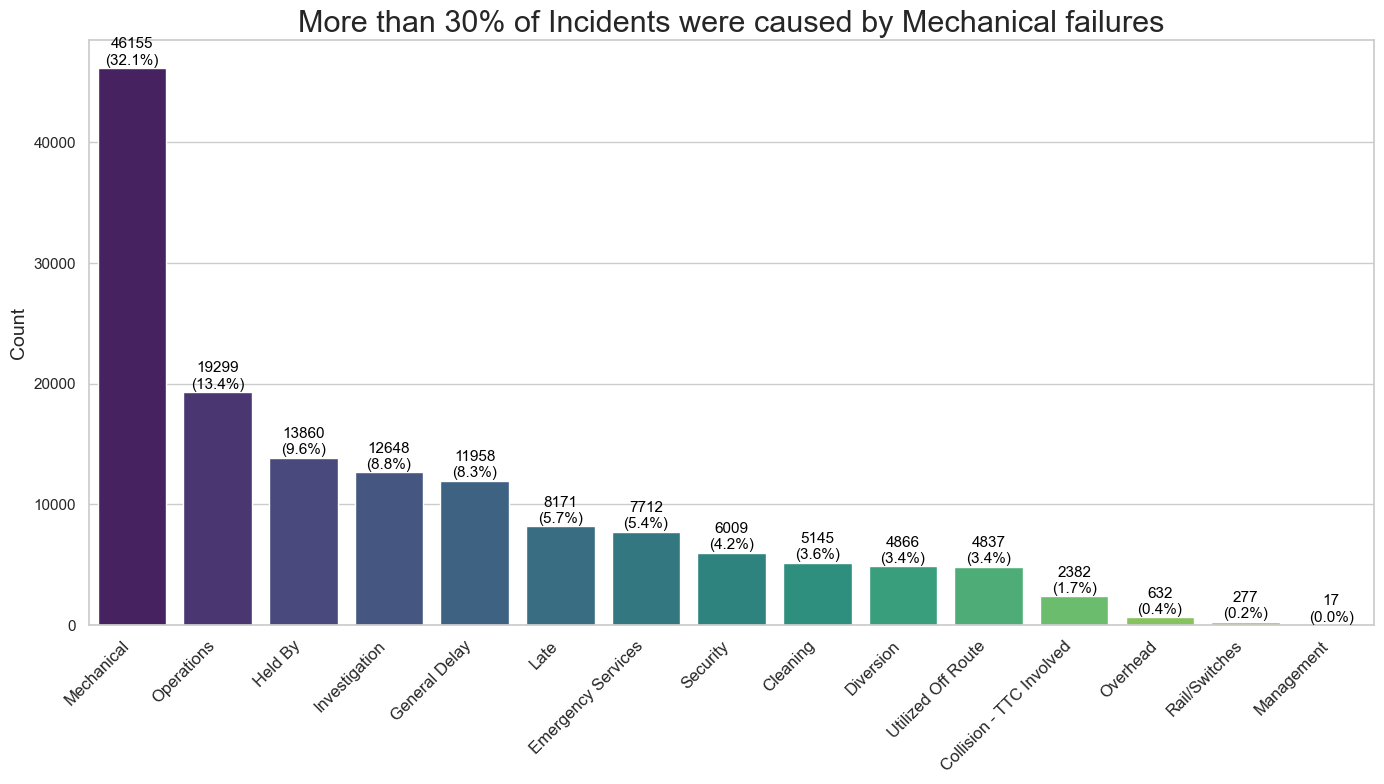

In [140]:
# Plot for distribution of incidents (Count)
plt.figure(figsize=(14, 8))

# Countplot without 'hue' since x-axis already represents categories
ax = sns.countplot(
    data=df, 
    x='incident', 
    order=incident_order,  # Ensuring the custom order is used
    palette='viridis'  # Add color to the bars
)

# Add both count and percentage annotations on bars
for p in ax.patches:
    height = p.get_height()  # Get height of the bar
    if height == 0:  # Skip zero-height bars
        continue
    
    # Calculate percentage
    percentage = (height / total_entries) * 100
    
    # Adjust text position dynamically to avoid overlap
    offset = 50 if height > max(df['incident'].value_counts()) * 0.1 else 20
    
    # Add annotation for count and percentage
    ax.annotate(
        f'{int(height)}\n({percentage:.1f}%)',  # Count and percentage
        (p.get_x() + p.get_width() / 2., height + offset),  # Position text above the bar
        ha='center', va='bottom', fontsize=11, color='black'
    )

# Set title and axis labels
plt.title('More than 30% of Incidents were caused by Mechanical failures', fontsize=22)
plt.ylabel('Count', fontsize=14)
plt.xlabel('')
plt.xticks(rotation=45, ha='right', fontsize=12)  # Adjust angle and alignment for better readability    
    
plt.tight_layout()
plt.show()

# Incident Frequency by Day of the Week
This graph displays the frequency of incidents occurring on each day of the week, providing insights into when incidents are most prevalent. The data reveals that certain days, particularly weekdays (Monday to Friday), experience a higher number of incidents compared to weekends (Saturday and Sunday). This trend suggests that increased operational demands during weekdays may lead to more service disruptions, prompting the need for targeted strategies to manage incidents effectively during peak times. Understanding these patterns can help TTC management allocate resources and implement preventive measures more efficiently.

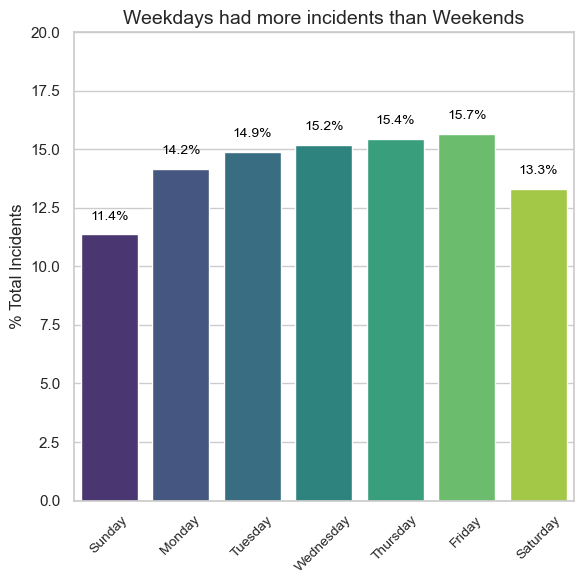

In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of total incidents by day
day_percentages = df['day'].value_counts(normalize=True).reindex(
    ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
) * 100

# Plot percentages
plt.figure(figsize=(6, 6))
sns.barplot(
    x=day_percentages.index,
    y=day_percentages.values,
    palette='viridis'
)

# Annotate bars with percentage values
for i, percentage in enumerate(day_percentages.values):
    plt.text(
        i, percentage + 0.5,  # Position text slightly above the bar
        f'{percentage:.1f}%',  # Format as percentage
        ha='center', va='bottom', fontsize=10, color='black'
    )

# Set title and axis labels
plt.title('Weekdays had more incidents than Weekends', fontsize=14)
plt.ylabel('% Total Incidents', fontsize=12)
plt.ylim([0,20])

# Rotate x-axis labels for readability
plt.xticks(rotation=45, fontsize=10)

plt.tight_layout()
plt.show()

# Average Delay Duration by Incident Type
This graph showcases the average delay duration associated with each type of incident affecting the TTC streetcar service. By analyzing the average delays, it becomes evident that certain incidents, such as "Diversion" and "Overhead" issues, result in significantly longer delays compared to others, like "Late", "Management", "Mechanical", "Utilized Off Route.", etc. This information is crucial for TTC management as it highlights which types of incidents are most disruptive to service and may require more focused maintenance or operational strategies to minimize their impact on overall service reliability. Understanding these averages can guide resource allocation and preventive measures to enhance service efficiency.

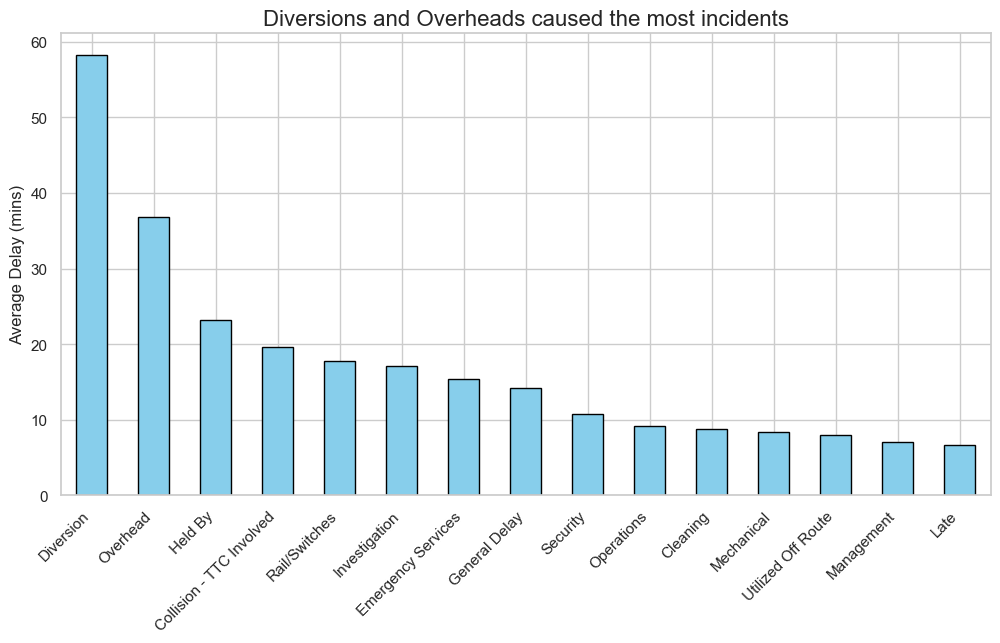

In [143]:
# Average Delay Duration by Incident Type
plt.figure(figsize=(12, 6))
avg_delay = df.groupby('incident')['delay'].mean().sort_values()[::-1]
avg_delay.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Diversions and Overheads caused the most incidents', size=16)
plt.ylabel('Average Delay (mins)')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

# Incident Distribution by Route
This graph illustrates the distribution of incidents across the top 10 routes in the TTC streetcar system, highlighting which routes experience the most service disruptions. The data indicates that certain routes like 501, 504, 506 are more prone to incidents, suggesting that these areas may require additional attention and resources to enhance operational efficiency.

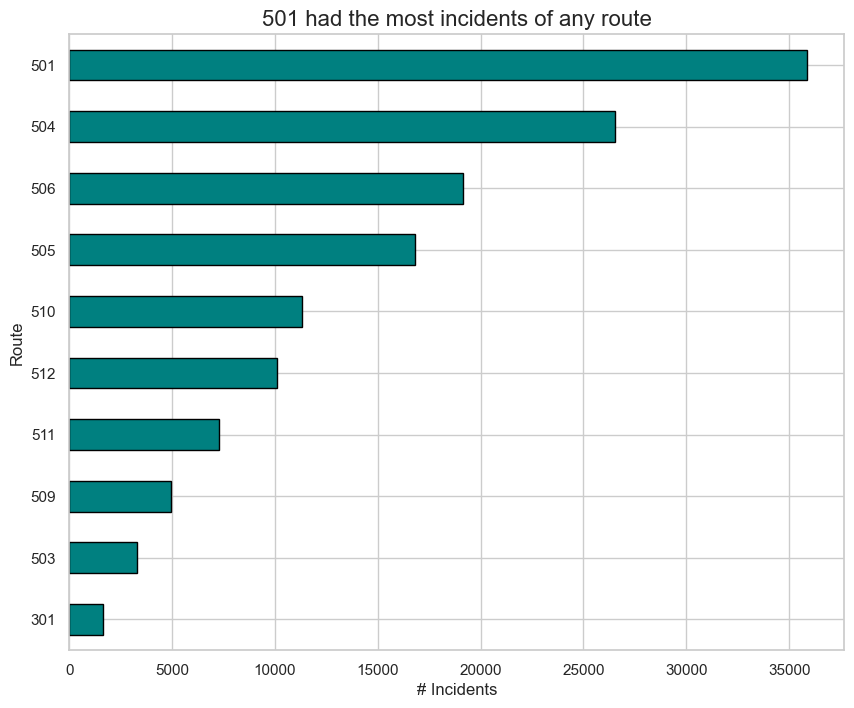

In [144]:
# Incident Distribution by Route
plt.figure(figsize=(10, 8))
route_counts = df['route'].value_counts().head(10)[::-1]
route_counts.plot(kind='barh', color='teal', edgecolor='black')
plt.title('501 had the most incidents of any route', size=16)
plt.xlabel('# Incidents')
plt.ylabel('Route')
plt.show()

# Incident Distribution by Route
This graph illustrates the distribution of incidents across the top 10 routes in the TTC streetcar system, highlighting which routes experience what amount of service disruptions.

In [124]:
# Incident Distribution by Route
# Get the top 10 routes with the most incidents
top_routes = df['route'].value_counts().head(10).index

# Filter the DataFrame for these top routes
filtered_df = df[df['route'].isin(top_routes)]

# Count incidents by route and incident type
incident_distribution = filtered_df.groupby(['route', 'incident']).size().unstack(fill_value=0)

In [146]:
# plt.figure(figsize=(16, 8))

# incident_distribution.plot(kind='barh', stacked=True, color=plt.cm.tab10.colors)

# plt.xlabel('Number of Incidents', fontsize=12)
# plt.ylabel('Route', fontsize=12)
# plt.legend(title='Incident Type', bbox_to_anchor=(1.55, 1))

# plt.title('Incident Distribution by Route', fontsize=16)

# plt.tight_layout()
# plt.show()

# Top 10 Locations with the Most Incidents
This graph identifies the top 10 locations where incidents occur most frequently within the TTC streetcar system. As illustrated, certain locations like such as "Dundas West Station," and "Broadview Station" experience a higher number of incidents compared to others. Understanding these hotspots can help in developing targeted strategies to reduce incidents and improve the overall passenger experience.

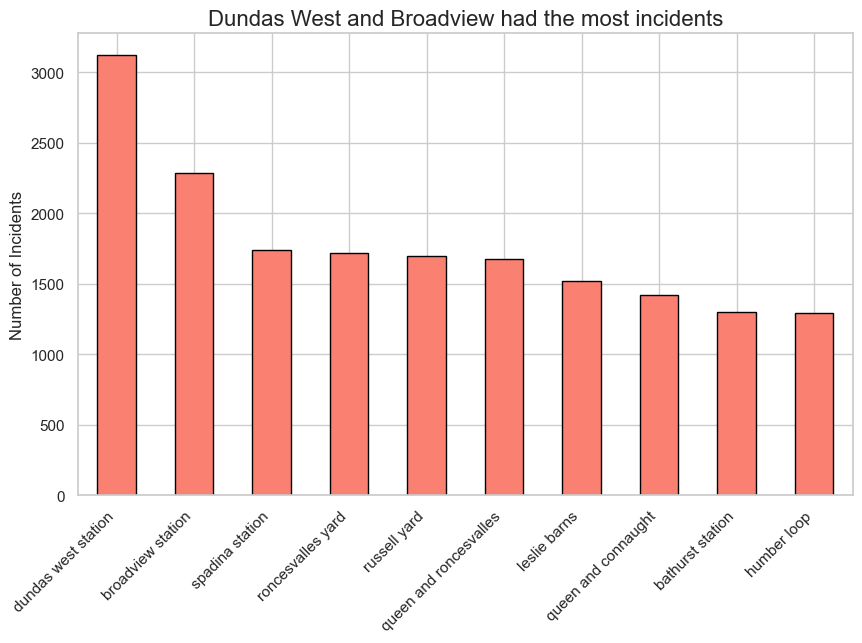

In [138]:
# Top 10 locations for incidents
top_locations = df['location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Dundas West and Broadview had the most incidents', size=16)
plt.ylabel('Number of Incidents')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()

# Delays Over Time (Trend Analysis)
This graph illustrates the trend of average delays experienced by the TTC streetcar system from 2014 to 2024. The line chart shows fluctuations in average delay durations over the years, revealing periods of increased delays that may correlate with specific incidents or operational challenges. By analyzing this trend, stakeholders can identify patterns and potential causes for service disruptions, enabling them to implement targeted strategies to improve service reliability and reduce delays for passengers.

# Top 5 Most Common Incidents
The summary of the top 5 incidents provides an insight into the most frequent causes of delays, helping stakeholders understand where improvements may be needed.

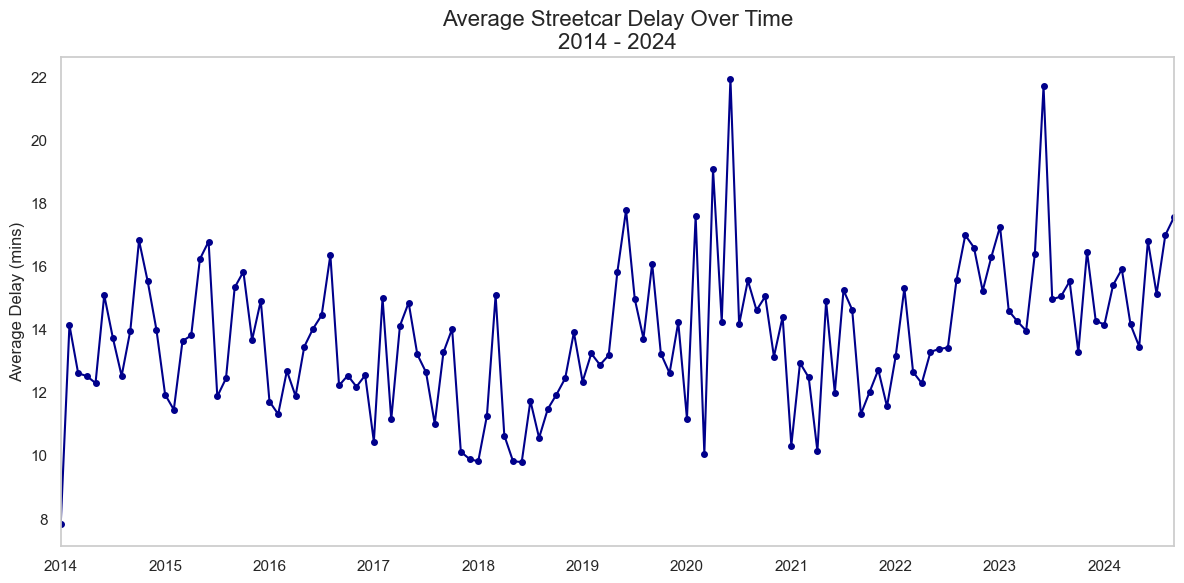

In [137]:
# Delays Over Time (Trend Analysis)
# Convert 'dt' column to datetime and extract year-month
df['dt'] = pd.to_datetime(df['dt'])
df['year_month'] = df['dt'].dt.to_period('M')

# Group by month and calculate mean delay
monthly_delay = df.groupby('year_month')['delay'].mean()

# Plot time series as a line chart
plt.figure(figsize=(12, 6))
monthly_delay.plot(color='darkblue', marker='o', linestyle='-', markersize=4)
plt.title('Average Streetcar Delay Over Time\n2014 - 2024', fontsize=16)
plt.xlabel('')
plt.ylabel('Average Delay (mins)', fontsize=12)
plt.xticks(rotation=0)
plt.grid()
plt.tight_layout()
plt.show()

In [129]:
# Print summary of top 5 incidents
incident_summary = round(df['incident'].value_counts(normalize=True).head(5)*100,1)
print("\nTop 5 Most Common Incidents:")
print(incident_summary)


Top 5 Most Common Incidents:
Mechanical       32.1
Operations       13.4
Held By           9.6
Investigation     8.8
General Delay     8.3
Name: incident, dtype: float64
